In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv("heart.csv")

In [46]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [48]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


EDA

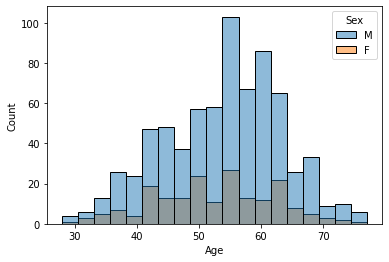

In [49]:
 sns.histplot(data=data,x='Age',hue='Sex')

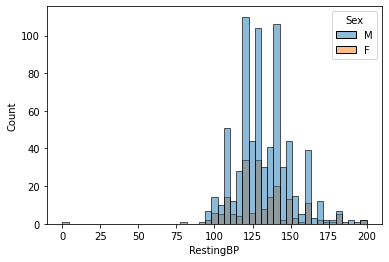

In [50]:
sns.histplot(data=data,x='RestingBP',hue='Sex')

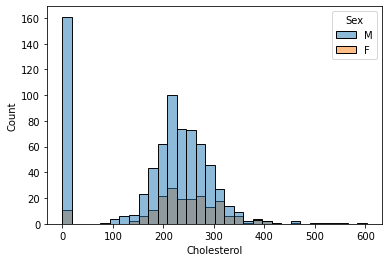

In [51]:
sns.histplot(data=data,x='Cholesterol',hue='Sex')

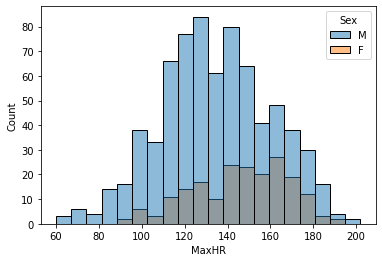

In [52]:
 sns.histplot(data=data,x='MaxHR',hue='Sex')

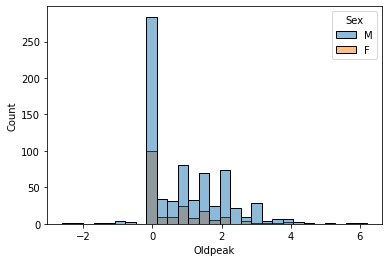

In [53]:
 sns.histplot(data=data,x='Oldpeak',hue='Sex')

In [54]:
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

init_notebook_mode(connected = True)

In [55]:
fig = go.Figure(data=[go.Pie(labels=data['ChestPainType'].value_counts().index,
                      values=data['ChestPainType'].value_counts().values)])
fig.show()

In [56]:
fig = go.Figure() 
 
fig.add_trace(go.Box(y=data['Cholesterol']))
fig.add_trace(go.Box(y=data['RestingBP']))
 
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



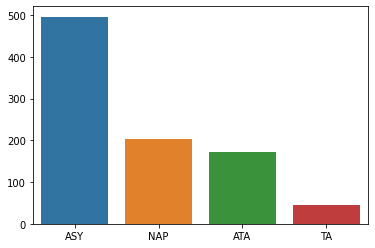

In [57]:
x1=data['ChestPainType'].value_counts().index
y1=data['ChestPainType'].value_counts().values
sns.barplot(x1,y1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



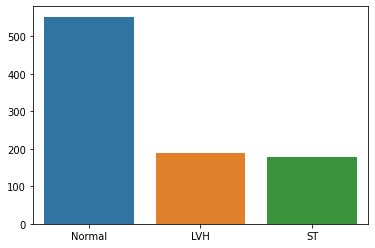

In [58]:
x2=data['RestingECG'].value_counts().index
y2=data['RestingECG'].value_counts().values
sns.barplot(x2,y2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



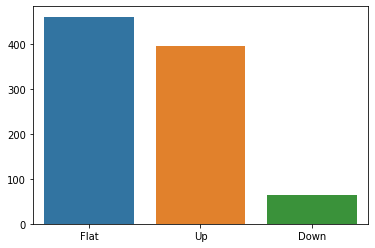

In [59]:
x3=data['ST_Slope'].value_counts().index
y3=data['ST_Slope'].value_counts().values
sns.barplot(x3,y3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



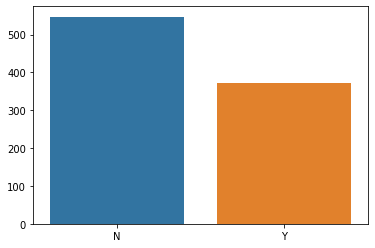

In [60]:
x4=data['ExerciseAngina'].value_counts().index
y4=data['ExerciseAngina'].value_counts().values
sns.barplot(x4,y4)

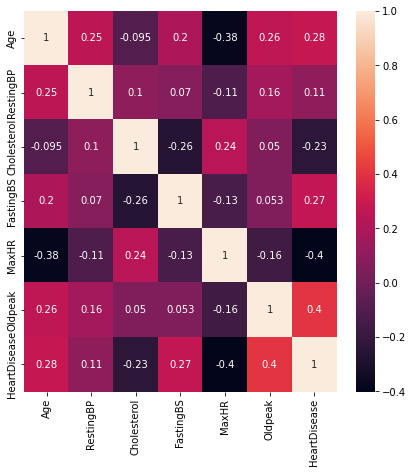

In [61]:
fig = plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)

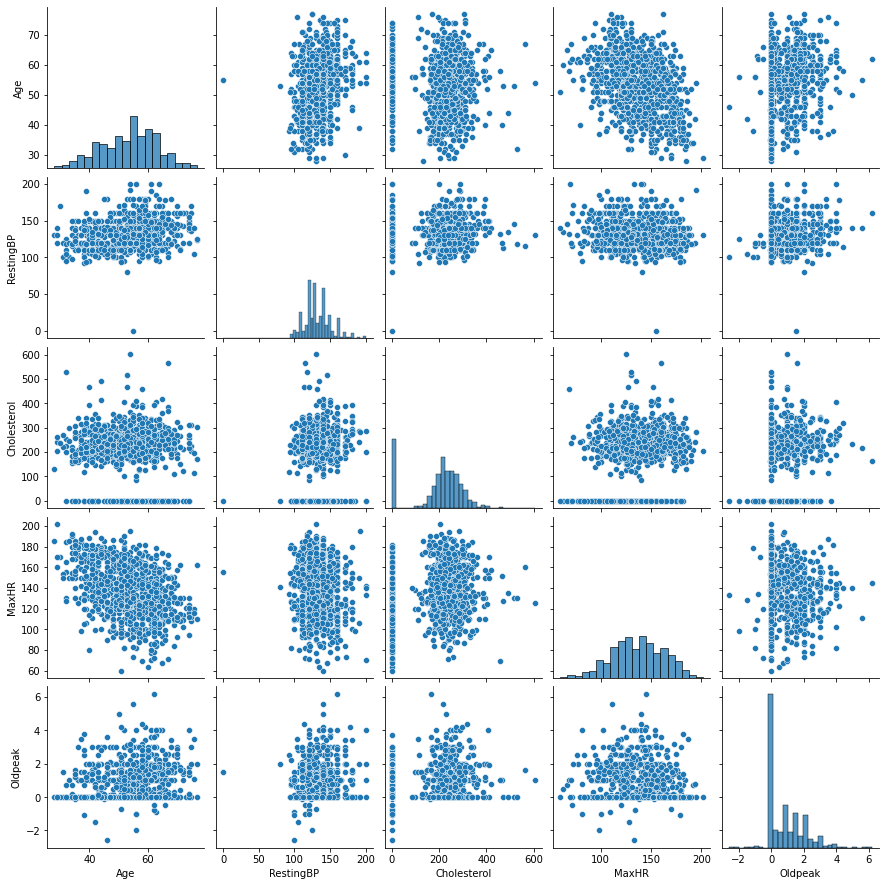

In [62]:
sns.pairplot(data[['Age','RestingBP','Cholesterol','MaxHR',	'Oldpeak']])

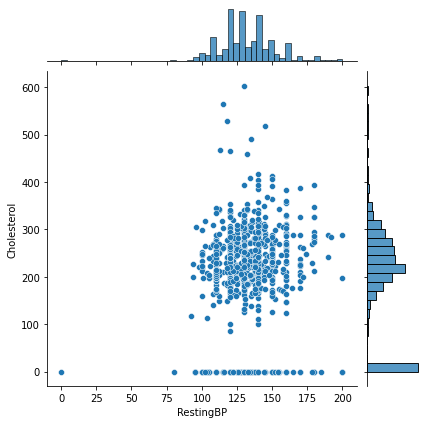

In [63]:
sns.jointplot(x='RestingBP',y='Cholesterol',data=data)

PreProcessing

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
x=data[['Age','FastingBS','RestingBP','Cholesterol','MaxHR','Oldpeak']]

In [67]:
standard_df = scaler.fit_transform(x)
standard_df

array([[-1.4331398 , -0.55134134,  0.41090889,  0.82507026,  1.38292822,
        -0.83243239],
       [-0.47848359, -0.55134134,  1.49175234, -0.17196105,  0.75415714,
         0.10566353],
       [-1.75135854, -0.55134134, -0.12951283,  0.7701878 , -1.52513802,
        -0.83243239],
       ...,
       [ 0.37009972, -0.55134134, -0.12951283, -0.62016778, -0.85706875,
         0.29328271],
       [ 0.37009972, -0.55134134, -0.12951283,  0.34027522,  1.4615246 ,
        -0.83243239],
       [-1.64528563, -0.55134134,  0.30282455, -0.21769643,  1.42222641,
        -0.83243239]])

In [68]:
x_std=standard_df
y=['Age','FastingBS','RestingBP','Cholesterol','MaxHR','Oldpeak']
data_fr = pd.DataFrame(data=x_std,columns=y)
data_fr.head()

,Age,FastingBS,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.433140,-0.551341,0.410909,0.825070,1.382928,-0.832432
1,-0.478484,-0.551341,1.491752,-0.171961,0.754157,0.105664
2,-1.751359,-0.551341,-0.129513,0.770188,-1.525138,-0.832432
3,-0.584556,-0.551341,0.302825,0.139040,-1.132156,0.574711
4,0.051881,-0.551341,0.951331,-0.034755,-0.581981,-0.832432


In [69]:
data = data.drop(['Age','FastingBS','RestingBP','Cholesterol','MaxHR','Oldpeak'],axis=1)

In [70]:
data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,Normal,N,Up,0
1,F,NAP,Normal,N,Flat,1
2,M,ATA,ST,N,Up,0
3,F,ASY,Normal,Y,Flat,1
4,M,NAP,Normal,N,Up,0


In [71]:
df = pd.concat([data,data_fr],axis=1)
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,FastingBS,RestingBP,Cholesterol,MaxHR,Oldpeak
0,M,ATA,Normal,N,Up,0,-1.433140,-0.551341,0.410909,0.825070,1.382928,-0.832432
1,F,NAP,Normal,N,Flat,1,-0.478484,-0.551341,1.491752,-0.171961,0.754157,0.105664
2,M,ATA,ST,N,Up,0,-1.751359,-0.551341,-0.129513,0.770188,-1.525138,-0.832432
3,F,ASY,Normal,Y,Flat,1,-0.584556,-0.551341,0.302825,0.139040,-1.132156,0.574711
4,M,NAP,Normal,N,Up,0,0.051881,-0.551341,0.951331,-0.034755,-0.581981,-0.832432


In [72]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [73]:
sex_df = pd.DataFrame(ohe.fit_transform(df[['Sex']]).toarray())
sex_df.columns =['Female','male']
sex_df.drop('Female',axis=1,inplace=True)

In [74]:
cpt_df = pd.DataFrame(ohe.fit_transform(df[['ChestPainType']]).toarray())
cpt_df.columns =['ASY','ATA', 'NAP', 'TA']
cpt_df.drop('ASY',axis=1,inplace=True)

In [75]:
rECG_df = pd.DataFrame(ohe.fit_transform(df[['RestingECG']]).toarray())
rECG_df.columns =['LVH', 'Normal', 'ST']
rECG_df.drop('LVH',axis=1,inplace=True)

In [76]:
ex_df = pd.DataFrame(ohe.fit_transform(df[['ExerciseAngina']]).toarray())
ex_df.columns =['N', 'Y']
ex_df.drop('N',axis=1,inplace=True)

In [77]:
slope_df = pd.DataFrame(ohe.fit_transform(df[['ST_Slope']]).toarray())
slope_df.columns =['Down', 'Flat', 'Up']
slope_df.drop('Down',axis=1,inplace=True)

In [78]:
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,FastingBS,RestingBP,Cholesterol,MaxHR,Oldpeak
0,M,ATA,Normal,N,Up,0,-1.433140,-0.551341,0.410909,0.825070,1.382928,-0.832432
1,F,NAP,Normal,N,Flat,1,-0.478484,-0.551341,1.491752,-0.171961,0.754157,0.105664
2,M,ATA,ST,N,Up,0,-1.751359,-0.551341,-0.129513,0.770188,-1.525138,-0.832432
3,F,ASY,Normal,Y,Flat,1,-0.584556,-0.551341,0.302825,0.139040,-1.132156,0.574711
4,M,NAP,Normal,N,Up,0,0.051881,-0.551341,0.951331,-0.034755,-0.581981,-0.832432


In [79]:
new = pd.concat([sex_df, cpt_df, rECG_df,ex_df,slope_df], axis=1)

In [80]:
final = pd.concat([df,new],axis=1)

In [81]:
final.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)

In [82]:
final.head()

,HeartDisease,Age,FastingBS,RestingBP,Cholesterol,MaxHR,Oldpeak,male,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,0,-1.433140,-0.551341,0.410909,0.825070,1.382928,-0.832432,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,-0.478484,-0.551341,1.491752,-0.171961,0.754157,0.105664,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,-1.751359,-0.551341,-0.129513,0.770188,-1.525138,-0.832432,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,-0.584556,-0.551341,0.302825,0.139040,-1.132156,0.574711,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0,0.051881,-0.551341,0.951331,-0.034755,-0.581981,-0.832432,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


ML Models

In [83]:
x=final.drop('HeartDisease',axis=1)
y=final['HeartDisease']

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

LogisticRegression

In [85]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       126
           1       0.83      0.87      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276

[[100  26]
 [ 19 131]]


In [87]:
LR_sc = clf.score(x_test, y_test)

KNN

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

pred = knn.predict(x_test)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(confusion_matrix(y_test,pred))

[[ 96  30]
 [ 30 120]]


In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       126
           1       0.80      0.80      0.80       150

    accuracy                           0.78       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.78      0.78      0.78       276



In [93]:
knn.score(x_test, y_test)

0.782608695652174

In [94]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

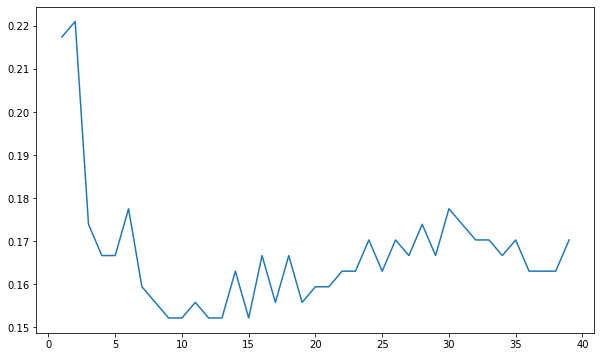

In [95]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.show()

In [96]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

pred = knn.predict(x_test)

In [97]:
print(confusion_matrix(y_test,pred))

[[101  25]
 [ 21 129]]


In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       126
           1       0.84      0.86      0.85       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



In [99]:
KNN_sc = knn.score(x_test, y_test)

SVM

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

In [101]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

predictions = model.predict(x_test)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       126
           1       0.85      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

[[103  23]
 [ 20 130]]


In [103]:
svm_sc = model.score(x_test, y_test)

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(x_train,y_train)
grid_predictions= grid.predict(x_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.566 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.574 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.570 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.853 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.837 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.867 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.852 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.859 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.837 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

In [105]:
print(confusion_matrix(y_test,grid_predictions))

print(classification_report(y_test,grid_predictions))

[[103  23]
 [ 19 131]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       126
           1       0.85      0.87      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [106]:
grid_sc = grid.score(x_test, y_test)

Decision Tree

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()

dtree.fit(x_train,y_train)

prediction =dtree.predict(x_test)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       126
           1       0.82      0.81      0.81       150

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276

[[100  26]
 [ 29 121]]


In [110]:
dtree_sc = dtree.score(x_test, y_test)

Final Scores

In [111]:
dt = {'model' : ["log_reg","KNN","SVM","Grid","decision_tree"],
        'score' : [LR_sc,KNN_sc,svm_sc,grid_sc,dtree_sc]}

In [112]:
df = pd.DataFrame(dt)

In [113]:
df

,model,score
0,log_reg,0.836957
1,KNN,0.833333
2,SVM,0.844203
3,Grid,0.847826
4,decision_tree,0.800725
